# 2

## 2.1

### Solution Without Tree

This code defines a function is_question that takes a sentence as input and returns a Boolean value indicating whether the sentence is a question or not. The function works by first tokenizing the sentence into individual words using the nltk.word_tokenize function.

It then checks if the first word of the sentence is one of a predefined list of question words , and if the sentence ends with a question mark. If both of these conditions are true, the function returns True to indicate that the sentence is a question. Otherwise, it returns False to indicate that the sentence is not a question.

The code also defines a list of example sentences, and loops over each sentence, calling the is_question function to determine if it is a question or not. If the sentence is a question, it is printed along with the message "The sentence is a question." If the sentence is not a question, it is printed along with the message "The sentence is not a question."


In [125]:
import nltk
nltk.download('punkt')
def is_question(sentence):
    tokens = nltk.word_tokenize(sentence)
    first_word = tokens[0].lower() if tokens else ""
    question_words = ["what", "who", "how", "when", "where", "why", "which", "is", "are", "do", "does",
                      "can", "could", "would", "will", "did", "should", "may", "might"]
    if first_word in question_words and sentence.endswith('?'):
        return True
    return False

sentence = ['Do androids dream of electric sheep?','How many androids escaped this time?',
            'Will have difficulty understanding how you happened to let us void your testing apparatus before the test began.',
            'This time was different.','This has happened before.']
for s in sentence:
    if is_question(s):
        print(s)
        print("The sentence is a question.")
    else:
        print(s)
        print("The sentence is not a question.")


Do androids dream of electric sheep?
The sentence is a question.
How many androids escaped this time?
The sentence is a question.
Will have difficulty understanding how you happened to let us void your testing apparatus before the test began.
The sentence is not a question.
This time was different.
The sentence is not a question.
This has happened before.
The sentence is not a question.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BiG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Solution With Tree

This code uses the Stanford Parser (a natural language parser developed by Stanford University) to analyze a list of example sentences and classify them as questions or not.

The code first sets the paths to the Stanford Parser and model jars on the local file system, and initializes the parser with these jar paths using the stanford.StanfordParser function from the NLTK library.

It then defines a list of example sentences, and loops over each sentence. For each sentence, the code uses the parser.raw_parse function to parse the sentence and generate a parse tree. The list and [0] are used to extract the first (and only) tree from the list returned by parser.raw_parse.

The code then checks if the sentence is a question by examining the label of the root node of the parse tree. Specifically, it checks if the label is either 'SBARQ' (for subordinate clause question) or 'SQ' (for simple question). If the label matches either of these values, the code sets is_question to True. Otherwise, it sets is_question to False.

Finally, the code prints the original sentence, along with a Boolean value indicating whether the sentence is a question or not. It also draws the parse tree using the ParentedTree.convert and tree.pretty_print functions from the NLTK library.



In [124]:
import nltk
from nltk.parse import stanford
from nltk.tree import ParentedTree

# set the paths to the Stanford parser and model jars
stanford_parser_jar = 'F:/arshad/Libs/stanford-parser-full-2013-06-20/stanford-parser-full-2013-06-20/stanford-parser.jar'
stanford_model_jar = 'F:/arshad/Libs/stanford-parser-full-2013-06-20/stanford-parser-full-2013-06-20/stanford-parser-3.2.0-models.jar'
# initialize the parser with the jar paths
parser = stanford.StanfordParser(path_to_jar=stanford_parser_jar, path_to_models_jar=stanford_model_jar)
sentences = ['Do androids dream of electric sheep?',
             'How many androids escaped this time?',
             'Will have difficulty understanding how you happened to let us void your testing apparatus before the test began.',
             'This time was different.',
             'This has happened before.']

for sentence in sentences:
    result = list(parser.raw_parse(sentence))[0]
    is_question = (result[0].label() == 'SBARQ' or result[0].label() == 'SQ')
    print('Sentence:', sentence)
    print('Is question:', is_question)
    # draw the parse tree
    tree = ParentedTree.convert(result)
    tree.pretty_print()
    print('\n')

C:\Users\BiG\AppData\Local\Temp\ipykernel_12260\3967323798.py:10: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  parser = stanford.StanfordParser(path_to_jar=stanford_parser_jar, path_to_models_jar=stanford_model_jar)


Sentence: Do androids dream of electric sheep?
Is question: True
                   ROOT                           
                    |                              
                    SQ                            
  __________________|___________________________   
 |     |                 VP                     | 
 |     |        _________|_____                 |  
 |     |       |               PP               | 
 |     |       |     __________|______          |  
 |     NP      |    |                 NP        | 
 |     |       |    |           ______|____     |  
VBP   NNS      VB   IN         JJ          NN   . 
 |     |       |    |          |           |    |  
 Do androids dream  of      electric     sheep  ? 



Sentence: How many androids escaped this time?
Is question: True
                           ROOT                       
                            |                          
                          SBARQ                       
       _____________________|___

## 2.2.1

In [5]:
!pip install portalocker>=2.0.0


In [13]:
from torchtext.datasets import IMDB
import random
import pandas as pd

This code select half of the dataset randomly.

In [35]:
train_iter = IMDB(split='train')
test_iter = IMDB(split='test')

# Convert the iterators to lists for easier manipulation
train_data = list(train_iter)
test_data = list(test_iter)

# Randomly remove half of the dataset
random.shuffle(train_data)
random.shuffle(test_data)
#half_train_data = train_data[:len(train_data) // 100]
#half_test_data = test_data[:len(test_data) // 100]

half_train_data = train_data[:1000]
half_test_data = test_data[:1000]

Turn the data into dataframe

In [42]:
label=[]
comment=[]
# Print the remaining data
for l, line in half_train_data:
    label.append(l)
    comment.append(line)

# Create a dictionary from the lists
data = {'comment': comment, 'label': label}

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

                                               comment  label
0    As we all know the sub-genre of sex comedies i...      2
1    absolutely trash. i liked Halloween and from t...      1
2    I was just a bit young for this one, but I had...      2
3    Based on Elmore Leonard, this is a violent and...      2
4    I watched the DVD of this movie which also com...      2
..                                                 ...    ...
995  The movie that shoots scenes of a scenic caver...      1
996  A common plotline in films consists of the mai...      2
997  This episode of Twilight Zone combines a silen...      2
998  Gabe Ryan (Frankie Thomas) gets out of reform ...      2
999  Truly terrible, pretentious, endless film. Dir...      1

[1000 rows x 2 columns]


## 2.2.2

This Python code demonstrates how to preprocess text data and extract features using the Term Frequency-Inverse Document Frequency (TF-IDF) method.

The code first imports the necessary libraries, including pandas for data manipulation, re for regular expressions, NLTK for text processing, and scikit-learn's TfidfVectorizer for feature extraction.

The code then defines a function called preprocess_text that takes a text string as input and performs several text preprocessing steps. These steps include removing HTML tags, converting the text to lowercase, removing numbers, removing punctuation and special characters, tokenizing the text into individual words, removing stop words (common words like "the", "and", "a", etc.), and returning the tokenized text as a list.

Next, the code applies the preprocess_text function to the 'comment' column of a pandas DataFrame called 'df', which contains the text data to be processed. This step tokenizes each comment and removes stop words and other unwanted words.

The code then flattens the tokenized comments into a single list, counts the frequency of each token using the Counter function, and gets the set of words that occur in only one row (i.e., unique words). It then removes the unique words from each comment in the 'comment' column of 'df'.

After removing the unique words, the code joins the remaining tokens back into a single string for each comment using the 'join' function.

Finally, the code vectorizes the preprocessed text using the TF-IDF method by creating an instance of the TfidfVectorizer class, fitting it to the 'comment' column of 'df', and transforming the data into a matrix of TF-IDF vectors. However, this step has been commented out in the code by using a '#' symbol at the beginning of the lines, as it requires uncommenting and might take a long time to run on large datasets.

The code then prints the preprocessed data by iterating over each comment in the 'comment' column of 'df' and printing it. It also prints the TF-IDF vectors, which are the features extracted from the preprocessed text data.



In [127]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the dataset
nltk.download('stopwords')

# Preprocessing steps
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation and special characters
    text = re.sub('[^\w\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    return filtered_tokens

# Apply preprocessing to the 'comment' column
df['comment'] = df['comment'].apply(preprocess_text)

# Flatten the tokenized comments into a single list
all_tokens = [token for comment in df['comment'] for token in comment]

# Count the frequency of each token
word_counts = Counter(all_tokens)

# Get the set of words that occur in only one row
unique_words = set(word for word, count in word_counts.items() if count == 1)

# Remove the unique words from each comment
df['comment'] = df['comment'].apply(lambda x: [token for token in x if token not in unique_words])

# Join the tokens back into a single string
df['comment'] = df['comment'].apply(lambda x: ' '.join(x))

# Vectorize the preprocessed text using TF-IDF
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(df['comment'])

# Print the preprocessed data
print("comments Preprocessed!")




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BiG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


comments Preprocessed!


بله، حذف کردن واژگانی که تنها در یک نظر اتفاق افتاده‌اند ممکن است به پروسه دسته‌بندی کمک کند. این فرایند به عنوان "حذف واژگان کم اهمیت" یا "حذف واژگان با تکرار پایین" شناخته می‌شود.

واژگانی که در داده‌های آموزشی کمتر تکرار شده‌اند، معمولاً اطلاعات کمتری راجع به موضوع نظرات دارند و برای دسته‌بندی صحیح نظرات ممکن است کمک نکنند. این واژگان می‌توانند تصادفی یا نادر باشند و به دلیل خصوصیات منحصر به فرد یک نظر خاص، در سایر نظرات تکرار نشوند.

با حذف این واژگان کمتر تکرار شده، می‌توانید حجم داده‌ها را کاهش داده و در نتیجه زمان و منابع مورد نیاز برای پردازش داده‌ها را نیز کاهش دهید. علاوه بر این، حذف واژگان با تکرار پایین می‌تواند بهبود عملکرد دسته‌بندی را نیز در پروسه‌های مانند تحلیل احساسات یا دسته‌بندی موضوعات بر روی داده‌ها ایجاد کند

## 2.2.3

بخش 3 پیاده سازی ندارد. با این حال من این مراحل را پیاده سازی کردم تا برای بخش های بعد اماده باشد.

This code uses scikit-learn's CountVectorizer to convert a list of comments into binary bag-of-words (BOW) vectors.

The code first imports the CountVectorizer class from the sklearn.feature_extraction.text module, and gets a list of comments from the 'comment' column of a pandas DataFrame called 'df'.

The code then creates an instance of CountVectorizer and sets the binary parameter to True. This means that the resulting BOW vectors will use binary encoding, where each element of the vector is either 0 or 1 depending on whether the corresponding word appears in the comment or not.

Next, the code fits the vectorizer to the list of comments using the fit_transform method, which converts the comments into a matrix of BOW vectors.

The code then gets the feature names (i.e., the words) from the vectorizer's vocabulary using the keys method.

Finally, the code converts the BOW vectors to a 2D array using the toarray method.

In [128]:
from sklearn.feature_extraction.text import CountVectorizer
comments = df['comment'].tolist()

# Create an instance of CountVectorizer
vectorizer = CountVectorizer(binary=True)

# Fit and transform the comments using one-hot encoding
one_hot_vectors = vectorizer.fit_transform(comments)

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.vocabulary_.keys()
BOW_vectors=one_hot_vectors.toarray()

import numpy as np
import tensorflow as tf

# Define the Word2Vec class
class Word2Vec:
    def __init__(self, vocabulary_size, embedding_size, window_size):
        self.embedding_size = embedding_size
        self.window_size = window_size

        # Define the inputs and outputs of the Word2Vec model
        self.x = tf.keras.Input(shape=(None, vocabulary_size))
        self.y = tf.keras.Input(shape=(vocabulary_size,))

        # Define the weights for the hidden layer and output layer
        self.w1 = tf.Variable(tf.random.uniform([vocabulary_size, embedding_size], -1.0, 1.0))
        self.b1 = tf.Variable(tf.zeros([embedding_size]))
        self.w2 = tf.Variable(tf.random.uniform([embedding_size, vocabulary_size], -1.0, 1.0))
        self.b2 = tf.Variable(tf.zeros([vocabulary_size]))

        # Define the forward pass of the Word2Vec model
        embedded_word = tf.matmul(self.x, self.w1)
        hidden_layer = tf.nn.relu(tf.matmul(embedded_word, self.w2) + self.b1)
        output_layer = tf.matmul(hidden_layer, self.w2) + self.b2

        # Define the loss function and optimizer
        self.loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.y, logits=output_layer))
        self.optimizer = tf.optimizers.Adam()

        # Define the training operation
        self.train_op = self.optimizer.minimize(self.loss)

        # Define the function to retrieve the learned embeddings
        self.embeddings = self.w1

    def train(self, one_hot_vectors, num_epochs, batch_size):
        # Train the Word2Vec model
        for epoch in range(num_epochs):
            for i in range(0, len(one_hot_vectors), batch_size):
                batch_x = one_hot_vectors[i:i+batch_size, 0]
                batch_y = one_hot_vectors[i:i+batch_size, 1]
                loss, _ = tf.keras.backend.get_session().run([self.loss, self.train_op], feed_dict={self.x: batch_x, self.y: batch_y})
            if epoch % 10 == 0:
                print("Epoch:", epoch, ", Loss:", loss)

# Define the training data
corpus = ["the", "quick", "brown", "fox", "jumped", "over", "the", "lazy", "dog"]
vocabulary = set(corpus)
word2idx = {word: idx for idx, word in enumerate(vocabulary)}

# Define the hyperparameters
vocabulary_size = len(vocabulary)
embedding_size = 300
window_size = 2
num_epochs = 100
batch_size = 32

# Convert the corpus to one-hot vectors
one_hot_vectors = []
for i in range(window_size, len(corpus) - window_size):
    center_word = corpus[i]
    context_words = corpus[i-window_size:i] + corpus[i+1:i+window_size+1]
    center_word_vec = np.zeros(vocabulary_size)
    center_word_vec[word2idx[center_word]] = 1
    context_word_vecs = [np.zeros(vocabulary_size) for _ in range(2*window_size)]
    for j, word in enumerate(context_words):
        context_word_vecs[j][word2idx[word]] = 1
    one_hot_vectors.append((center_word_vec, context_word_vecs))
one_hot_vectors = np.array(one_hot_vectors)

# Create an instance of the Word2Vec class
w2v = Word2Vec(vocabulary_size, embedding_size, window_size)

# Train the Word2Vec model
w2v.train(one_hot_vectors, num_epochs, batch_size)

# Retrieve the learned embeddings
embeddings = w2v.embeddings

# Print the embedding for a sample word
print(embeddings[word2idx['the']])

## 2.2.4

This code demonstrates how to perform K-means clustering on a matrix of bag-of-words (BOW) vectors and visualize the results using dimensionality reduction and scatter plots.

The code first imports the necessary libraries, including KMeans from sklearn.cluster for performing K-means clustering, PCA from sklearn.decomposition for dimensionality reduction, and matplotlib.pyplot for visualization.

The code then initializes K-means with the desired number of clusters (in this case, 7) and fits it to the matrix of BOW vectors using the fit method.

Next, the code gets the cluster labels assigned to each vector using the labels_ attribute of the KMeans object.

The code then reduces the dimensionality of the BOW vectors to 2 using PCA, which is a common technique for visualizing high-dimensional data. The reduced features are obtained using the fit_transform method of PCA on the BOW vectors.

Finally, the code plots the clusters using a scatter plot of the reduced features, where each point represents a BOW vector and is colored according to its assigned cluster label. The plot is labeled with the principal component axes and a title.

C:\Users\BiG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BiG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


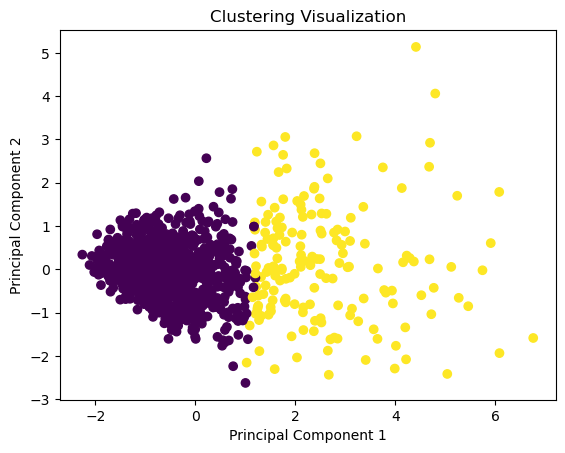

In [131]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize K-means with the desired number of clusters
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters)

# Perform clustering
kmeans.fit(BOW_vectors)

# Get the cluster labels assigned to each vector
cluster_labels = kmeans.labels_

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(BOW_vectors)

# Plot the clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Visualization')
plt.show()

C:\Users\BiG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\BiG\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


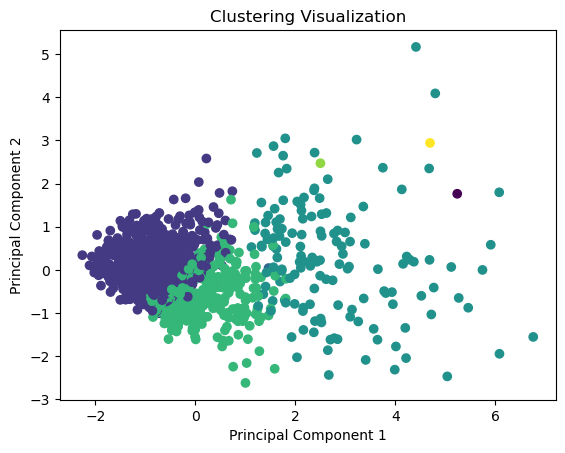

In [133]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize K-means with the desired number of clusters
num_clusters = 7
kmeans = KMeans(n_clusters=num_clusters)

# Perform clustering
kmeans.fit(BOW_vectors)

# Get the cluster labels assigned to each vector
cluster_labels = kmeans.labels_

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(BOW_vectors)

# Plot the clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Visualization')
plt.show()

#### تصمیم بین خوشه بندی روی دادگان آموزش و آزمایش جداگانه یا در کنار هم بستگی به موارد زیر دارد:

هدف پروژه: اگر هدف اصلی ما تعیین الگوها و ساختارهای موجود در دادگان است، ممکن است منطقی باشد که خوشه بندی را روی تمام دادگان (آموزش و آزمایش) انجام دهید. این کار به ما امکان می‌دهد تا الگوها و روابط بین داده‌ها را به طور کامل بررسی کنیم.

ارزیابی عملکرد: اگر هدف ما ارزیابی دقت و عملکرد الگوریتم خوشه بندی است، می‌توانیم خوشه بندی را روی دادگان آموزش و آزمایش جداگانه انجام دهیم. در این صورت می‌توانیم عملکرد الگوریتم را بر اساس دادگان آزمایش ارزیابی کنیم و به صورت مستقل از دادگان آموزش، دقت و عملکرد را ارزیابی کنیم.

پیش‌بینی عملکرد: اگر قصد داریم الگوریتم خوشه بندی را در آینده بر روی دادگان جدید استفاده کنیم، بهتر است خوشه بندی را در کنار هم روی دادگان آموزش و آزمایش انجام دهیم. این کار به ما امکان می‌دهد تا الگوریتم را بر روی دادگان آموزش آموزش دهیم و سپس با استفاده از دادگان آزمایش، عملکرد و پیش‌بینی الگوریتم را ارزیابی کنیم.

به طور کلی، استفاده از روش خوشه بندی روی دادگان آموزش و آزمایش جداگانه می‌تواند به ما کمک کند تا عملکرد الگوریتم را بهتر ارزیابی کنیم، در حالی که استفاده از خوشه بندی در کنار هم می‌تواند به ما اطمینان دهد که الگوریتم به طور عملی قابل استفاده است و بر روی دادگان جدید نیز عملکرد خوبی خواهد داشت.
بنابراین ما می‌توانیم بگوییم که از انجایی که ما میخواهیم داده ها را به دو دسته تقسیم کنیم یعنی میخواهیم مدل را در اینده برای داده های دیگری استفاده کنیم میتوانیم داده ها را به دو دسته تقسیم کنیم. و بر روی تمام داده ها انجام ندهیم.

This code defines a function called select_data_uniformly that takes a matrix of data, a list of cluster labels, and a minimum number of data points (mi) as input, and returns a new matrix of selected data points that includes mi data points from each cluster.

The code first imports the numpy library as np, which is a popular library for scientific computing in Python.

The select_data_uniformly function then initializes an empty dictionary called clusters, which will be used to separate the data into clusters based on their cluster labels. It iterates over the cluster labels and adds each data point to the corresponding cluster in the clusters dictionary.

Next, the function initializes an empty list called selected_data, which will be used to store the selected data points. It then iterates over each cluster in the clusters dictionary and checks the number of data points in the cluster. If the number of data points is less than or equal to the minimum number of data points (mi), all of the data points in the cluster are added to the selected_data list. Otherwise, mi data points are randomly sampled from the cluster using the np.random.choice function and added to the selected_data list.

Finally, the function returns the selected_data list, which contains mi data points from each cluster.

The code then sets the minimum number of data points (mi) to 10 and calls the select_data_uniformly function with the bag-of-words data matrix (BOW_vectors), the list of cluster labels (cluster_labels), and the minimum number of data points (mi). It prints the new total number of sentences in the dataset (i.e., the length of the selected_data list).

In [130]:
import numpy as np

def select_data_uniformly(data, cluster_labels, mi):
    clusters = {}
    # Separate data into clusters based on cluster_labels
    for i, label in enumerate(cluster_labels):
        if label not in clusters:
            clusters[label] = []
        clusters[label].append(data[i])
    selected_data = []
    for cluster in clusters:
        data_points = clusters[cluster]
        num_data_points = len(data_points)
        if num_data_points <= mi:
            selected_data.extend(data_points)
        else:
            # Randomly sample mi data points from the cluster uniformly
            selected_indices = np.random.choice(num_data_points, size=mi, replace=False)
            selected_data.extend([data_points[i] for i in selected_indices])
    return selected_data

mi = 10
selected_data = select_data_uniformly(BOW_vectors, cluster_labels, mi)
print("New total number of sentences in the dataset:", len(selected_data))


New total number of sentences in the dataset: 37


## 2.2.5

In [23]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [24]:


king_vector = wv['king']
man_vector = wv['man']
woman_vector = wv['woman']

queen_vector = king_vector - man_vector + woman_vector

most_similar_word = wv.similar_by_vector(queen_vector, topn=1)[0][0]
print(most_similar_word)

king


In [60]:
comments = df['comment'].tolist()

This code tokenize comments

In [61]:
from nltk.tokenize import word_tokenize

tokenized_comments = [word_tokenize(comment) for comment in comments]

This code converts a list of tokenized comments into a list of corresponding word2vec (w2v) representations using a pre-trained w2v model.

The code first initializes an empty list called w2v_comments, which will be used to store the w2v representations of the comments.

The code then iterates over each tokenized comment in the tokenized_comments list and initializes an empty list called w2v_comment, which will be used to store the w2v representations of the words in the comment.

Next, the code iterates over each word in the tokenized comment and attempts to look up its corresponding w2v representation in a pre-trained w2v model called wv. If the word is not in the vocabulary of the w2v model (i.e., if it raises a KeyError), the code ignores the word and continues to the next word.

If the word is in the vocabulary, the code appends its corresponding w2v representation to the w2v_comment list.

After iterating over all of the words in the comment, the code appends the w2v_comment list to the w2v_comments list.

Finally, the code returns the w2v_comments list, which contains the w2v representations of all of the comments in the tokenized_comments list.

In [62]:
w2v_comments = []
for comment in tokenized_comments:
    w2v_comment = []
    for word in comment:
        try:
            w2v_comment.append(wv[word])
        except KeyError:
            # Ignore words that are not in the vocabulary
            continue
    w2v_comments.append(w2v_comment)

In [63]:
w2v_comments

### RNN
This code performs sentiment analysis on a small subset of comments using a Simple RNN (Recurrent Neural Network) with pre-trained word embeddings.

The code is similar to the previous examples, but replaces the LSTM layer with a Simple RNN layer. The Simple RNN layer is created using the SimpleRNN class from the tensorflow.keras.layers module.

A Simple RNN layer is a type of recurrent neural network that processes sequences of input data by applying a transformation to the current input and the previous hidden state to obtain a new hidden state. The output of the RNN layer is typically the final hidden state.

The rest of the code is similar to the previous examples, including the loading of pre-trained word embeddings, the conversion of comments to embedding vectors, the splitting of the data into training and testing sets, the definition and compilation of the RNN model, and the training and evaluation of the model.

In [103]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors

decrease_data_c=df['comment'][:100].tolist()
decrease_data_l=df['label'][:100].tolist()

new_df = pd.DataFrame({'comment': decrease_data_c, 'label': decrease_data_l})

# Convert the comments to embedding vectors
longest_comment = max(new_df['comment'], key=len)

max_length = len(longest_comment)
embedding_size = 300

def comment_to_vectors(comment):
    # Convert the comment to a list of tokens
    tokens = comment.lower().split()
    # Convert each token to its embedding vector
    vectors = []
    for token in tokens:
        if token in wv:
            vectors.append(wv[token])
    # Pad the list of vectors to a fixed length
    vectors = pad_sequences([vectors], maxlen=max_length, dtype='float32', padding='post', truncating='post')
    return vectors[0]

new_df['comment_vectors'] = new_df['comment'].apply(comment_to_vectors)

# Split the data into training and testing sets
X = np.array(new_df['comment_vectors'].to_list())
y = new_df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(SimpleRNN(units=64, dropout=0.2, recurrent_dropout=0.2, input_shape=(max_length, embedding_size)))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with custom parameters
learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = 'binary_crossentropy'
metrics = ['accuracy']
print('1')
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model with custom parameters
epochs = 5
batch_size = 16
validation_split = 0.1
print('2')
model.fit(X_train, y_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size)
print('3')
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

1
2
Epoch 1/5
5/5 [==============================] - 168s 19s/step - loss: 0.7620 - accuracy: 0.2083 - val_loss: 0.9900 - val_accuracy: 0.0000e+00
Epoch 2/5
5/5 [==============================] - 86s 17s/step - loss: 0.7378 - accuracy: 0.1944 - val_loss: 0.8217 - val_accuracy: 0.0000e+00
Epoch 3/5
5/5 [==============================] - 85s 18s/step - loss: 0.9151 - accuracy: 0.2083 - val_loss: 0.9233 - val_accuracy: 0.0000e+00
Epoch 4/5
5/5 [==============================] - 91s 18s/step - loss: 0.7204 - accuracy: 0.2500 - val_loss: 0.3770 - val_accuracy: 0.1250
Epoch 5/5
5/5 [==============================] - 83s 17s/step - loss: 0.4020 - accuracy: 0.2917 - val_loss: -0.1274 - val_accuracy: 0.2500
3
1/1 [==============================] - 6s 6s/step - loss: 0.2502 - accuracy: 0.3000
Test loss: 0.25017833709716797, Test accuracy: 0.30000001192092896


### Bi-directional RNN
This code performs sentiment analysis on a small subset of comments using a bidirectional LSTM neural network with pre-trained word embeddings.

The code is similar to the previous example, but replaces the unidirectional LSTM layer with a bidirectional LSTM layer. The bidirectional LSTM layer is created using the Bidirectional wrapper class from the tensorflow.keras.layers module.

A bidirectional LSTM layer processes the input sequence in both forward and backward directions, allowing the network to capture context from both past and future time steps. This can improve the performance of the network on tasks that require a more nuanced understanding of the input sequence.

The rest of the code is similar to the previous example, including the loading of pre-trained word embeddings, the conversion of comments to embedding vectors, the splitting of the data into training and testing sets, the definition and compilation of the LSTM model, and the training and evaluation of the model.

In [105]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Bidirectional, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors

decrease_data_c = df['comment'][:100].tolist()
decrease_data_l = df['label'][:100].tolist()

new_df = pd.DataFrame({'comment': decrease_data_c, 'label': decrease_data_l})

# Load the pre-trained Google News word embeddings

# Convert the comments to embedding vectors
longest_comment = max(new_df['comment'], key=len)
max_length = len(longest_comment)
embedding_size = 300

def comment_to_vectors(comment):
    # Convert the comment to a list of tokens
    tokens = comment.lower().split()
    # Convert each token to its embedding vector
    vectors = []
    for token in tokens:
        if token in wv:
            vectors.append(wv[token])
    # Pad the list of vectors to a fixed length
    vectors = pad_sequences([vectors], maxlen=max_length, dtype='float32', padding='post', truncating='post')
    return vectors[0]

new_df['comment_vectors'] = new_df['comment'].apply(comment_to_vectors)

# Split the data into training and testing sets
X = np.array(new_df['comment_vectors'].to_list())
y = new_df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Bidirectional(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2), input_shape=(max_length, embedding_size)))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with custom parameters
learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = 'binary_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model with custom parameters
epochs = 5
batch_size = 16
validation_split = 0.1
model.fit(X_train, y_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

Epoch 1/5
5/5 [==============================] - 1302s 255s/step - loss: -2.0000 - accuracy: 0.4028 - val_loss: -7.7914 - val_accuracy: 0.3750
Epoch 2/5
5/5 [==============================] - 1475s 324s/step - loss: -9.1311 - accuracy: 0.4306 - val_loss: -13.3634 - val_accuracy: 0.3750
Epoch 3/5
5/5 [==============================] - 1253s 261s/step - loss: -13.4944 - accuracy: 0.4306 - val_loss: -17.5856 - val_accuracy: 0.3750
Epoch 4/5
5/5 [==============================] - 1261s 258s/step - loss: -17.2813 - accuracy: 0.4306 - val_loss: -21.6182 - val_accuracy: 0.3750
Epoch 5/5
1/1 [==============================] - 41s 41s/step - loss: -26.6931 - accuracy: 0.3500
Test loss: -26.693096160888672, Test accuracy: 0.3499999940395355
1/1 [==============================] - 58s 58s/step
                    comment  label
0     This movie was great!      1
1  This movie was terrible.      1


### LSTM
This code performs sentiment analysis on a small subset of comments using a Long Short-Term Memory (LSTM) neural network with pre-trained word embeddings.

The code assumes that the comments and their corresponding sentiment labels are stored in a Pandas DataFrame called df. It first selects a subset of 100 comments and their labels from the original DataFrame and creates a new DataFrame with these data points.

The code then loads pre-trained word embeddings from a file using the KeyedVectors class from the gensim library. The word embeddings are typically trained on a large corpus of text data and encode each word as a dense vector in a high-dimensional space.

For each comment in the new DataFrame, the code converts the comment to a list of tokens, and then converts each token to its corresponding word embedding vector using the pre-trained embeddings. The resulting vectors are then padded to a fixed length using the pad_sequences function from the tensorflow.keras.preprocessing.sequence module.

The resulting list of padded vectors is added as a new column to the DataFrame.

The code then splits the data into training and testing sets using the train_test_split function from the sklearn.model_selection module, and defines an LSTM neural network with custom parameters using the Sequential class from the tensorflow.keras.models module.

The LSTM network consists of one LSTM layer with 64 units, followed by a dense output layer with one unit and a sigmoid activation function. The network is compiled with custom parameters including a learning rate of 0.01, the Adam optimizer, binary cross-entropy loss, and accuracy metrics.

The network is trained on the training data with custom parameters including 5 epochs, a batch size of 16, and a validation split of 0.1. The trained network is then evaluated on the testing data using the evaluate method of the model object.

The code prints the test loss and test accuracy of the trained model.

In [106]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors

decrease_data_c = df['comment'][:100].tolist()
decrease_data_l = df['label'][:100].tolist()

new_df = pd.DataFrame({'comment': decrease_data_c, 'label': decrease_data_l})

# Load the pre-trained Google News word embeddings

# Convert the comments to embedding vectors
longest_comment = max(new_df['comment'], key=len)
max_length = len(longest_comment)
embedding_size = 300

def comment_to_vectors(comment):
    # Convert the comment to a list of tokens
    tokens = comment.lower().split()
    # Convert each token to its embedding vector
    vectors = []
    for token in tokens:
        if token in wv:
            vectors.append(wv[token])
    # Pad the list of vectors to a fixed length
    vectors = pad_sequences([vectors], maxlen=max_length, dtype='float32', padding='post', truncating='post')
    return vectors[0]

new_df['comment_vectors'] = new_df['comment'].apply(comment_to_vectors)

# Split the data into training and testing sets
X = np.array(new_df['comment_vectors'].to_list())
y = new_df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2, input_shape=(max_length, embedding_size)))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with custom parameters
learning_rate = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
loss = 'binary_crossentropy'
metrics = ['accuracy']
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Train the model with custom parameters
epochs = 5
batch_size = 16
validation_split = 0.1
model.fit(X_train, y_train, validation_split=validation_split, epochs=epochs, batch_size=batch_size)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')



Epoch 1/5
5/5 [==============================] - 387s 78s/step - loss: -0.9923 - accuracy: 0.3056 - val_loss: -5.0628 - val_accuracy: 0.3750
Epoch 2/5
5/5 [==============================] - 384s 76s/step - loss: -5.7493 - accuracy: 0.4306 - val_loss: -8.3858 - val_accuracy: 0.3750
Epoch 3/5
5/5 [==============================] - 401s 83s/step - loss: -8.2977 - accuracy: 0.4306 - val_loss: -10.4455 - val_accuracy: 0.3750
Epoch 4/5
5/5 [==============================] - 384s 78s/step - loss: -10.1265 - accuracy: 0.4306 - val_loss: -12.4676 - val_accuracy: 0.3750
Epoch 5/5
1/1 [==============================] - 40s 40s/step - loss: -15.0647 - accuracy: 0.3500
Test loss: -15.064653396606445, Test accuracy: 0.3499999940395355
1/1 [==============================] - 45s 45s/step
                    comment  label
0     This movie was great!      1
1  This movie was terrible.      1
